In [4]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print(u'Находим числа в строке: ', numbers)

print(u'Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print(u'Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))
# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']


In [5]:
russian_words = re.findall(r'[а-яёЁА-Я-]+', r'Там frgrtg какие-то слова')
russian_words

['Там', 'какие-то', 'слова']

In [24]:
import io
wordlist = None
text_file_path = 'spelling.txt'
with io.open(text_file_path, "r", encoding='utf-8') as text_file:
    text = text_file.read()
    wordlist = re.findall(r'[а-яёЁА-Я-]+', text.lower())

In [5]:
class Node:
    def __init__(self):
        '''
        Simple constructor without params
        '''
        pass
    
    def method(self, par):
        '''
        Simple method with one param
        '''
        pass
    

In [61]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline

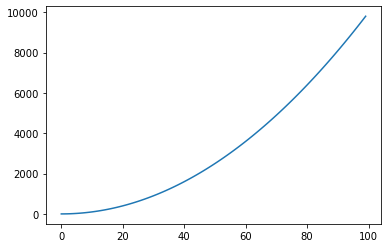

In [7]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

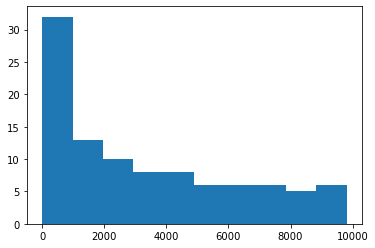

In [8]:
plt.hist(data)

In [9]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

Wall time: 30.4 s


# Задание

In [48]:
def corpus_trigrams(word_list):
    trigrams = dict()
    
    for word in word_list:
        trig = '##' + word + '##'
        for i in range(len(trig) - 2):
            trigram = trig[i: i + 3]
            if trigram in trigrams.keys():
                trigrams[trigram] += 1
            else:
                trigrams[trigram] = 1
    return trigrams

def is_error(word, trigrams):
    word = '##' + word + '##'
    k = 0
    for i in range(len(word) - 3):
        trigram = word[i:i+3]
        if (k>=2):
            return True
        if (trigram not in trigrams.keys()):
            k+=1
    return False
        

In [31]:
corpus_trigrams(wordlist)

{'##г': 75,
 '#гл': 23,
 'гла': 27,
 'лав': 7,
 'ава': 6,
 'ва#': 10,
 'а##': 296,
 '##н': 376,
 '#ни': 58,
 'ник': 41,
 'ико': 26,
 'ког': 30,
 'огд': 15,
 'гда': 16,
 'да#': 33,
 '#не': 167,
 'не#': 100,
 'е##': 364,
 '##р': 95,
 '#ра': 43,
 'раз': 39,
 'азг': 4,
 'зго': 3,
 'гов': 27,
 'ова': 23,
 'вар': 2,
 'ари': 6,
 'рив': 8,
 'ива': 17,
 'вай': 7,
 'айт': 6,
 'йте': 8,
 'те#': 42,
 '##с': 300,
 '#с#': 25,
 'с##': 58,
 'неи': 15,
 'еиз': 15,
 'изв': 27,
 'зве': 20,
 'вес': 21,
 'ест': 57,
 'стн': 19,
 'тны': 13,
 'ным': 10,
 'ыми': 4,
 'ми#': 18,
 'и##': 294,
 '##о': 194,
 '#од': 13,
 'одн': 21,
 'дна': 5,
 'наж': 2,
 'ажд': 7,
 'жды': 1,
 'ды#': 4,
 'ы##': 79,
 '##в': 330,
 '#ве': 27,
 'есн': 6,
 'сно': 8,
 'ною': 1,
 'ою#': 7,
 'ю##': 44,
 '#в#': 91,
 'в##': 127,
 '##ч': 121,
 '#ча': 4,
 'час': 9,
 'ас#': 19,
 'неб': 3,
 'ебы': 2,
 'быв': 8,
 'ыва': 16,
 'вал': 25,
 'ало': 17,
 'ло#': 37,
 'о##': 512,
 '##ж': 38,
 '#жа': 6,
 'жар': 3,
 'арк': 9,
 'рко': 6,
 'ого': 66,
 'го#': 1

In [59]:
is_error('совсем', corpus_trigrams(wordlist))

False

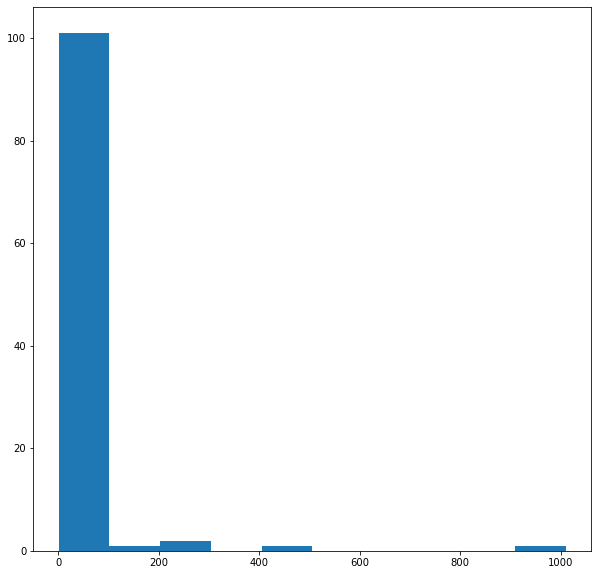

In [70]:
#Гистограмма
trigrams = corpus_trigrams(wordlist)
numb = list(trigrams.values())
t = {}
for i in numb:
    if (i in t.keys()):
        t[i]+=1
    else:
        t[i] = 1
plt.figure(figsize=(10,10))
plt.hist(t.values())
plt.show()

# Бор

In [130]:
wordlist = list(set(wordlist))

In [131]:
from nltk.metrics.distance import edit_distance
def correct_word(word):
    min_dist = edit_distance(word, wordlist[0])
    for i in wordlist:
        dist = edit_distance(word, i)
        if (dist < min_dist):
            min_dist = dist
    
    sim_words =[]
    for k in wordlist:
        dist = edit_distance(word, k)
        if (dist == min_dist):
            sim_words.append(k)
    return sim_words

def correct_word_naive(word):
    
    alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
    letters = []
    for l in alph:
        letters.append(l)
    
    l_word = []
    for i in word:
        l_word.append(i)
    
    new_word = []
    for i in range(len(letters)):
        for j in range(len(word)):
            change = l_word.copy()
            change[j] = letters[i]
            new_word.append(''.join(change))
    sim_words = []
    for k in new_word:
        l_word1 = []
        for j in k:
            l_word1.append(j)
        for i in range(len(letters)):
            for j in range(len(word)):
                change = l_word1.copy()
                change[j] = letters[i]
                p = ''.join(change)
                if (p in wordlist):
                    sim_words.append(p)
    return list(set(sim_words))


In [132]:
correct_word('стойу')

['той', 'стоит', 'свой', 'сто', 'стоял', 'столь', 'этому', 'этой']

In [133]:
correct_word_naive('стойу')

['этому', 'стоял', 'столь', 'стоит']

# Все вместе

In [219]:
from string import punctuation
def correct_mistakes(text):
    text = re.split("( )",text)
    #print(text)
    for i in range(len(text)):
        if (text[i] == " "):
            continue
        t = 0
        begin_symb = []
        end_symb = []
        word = []
        word_up = []
        for j in range(len(text[i])):
            if (t==0):
                if ((text[i][j] in punctuation) or (text[i][j].isspace() == True) or (text[i][j].isdigit() == True)):
                    begin_symb.append(text[i][j])
                    continue
                if (text[i][j].isalpha() == True):
                    t = 1
            if (t==1):
                if ((text[i][j] in punctuation) or (text[i][j].isspace() == True) or (text[i][j].isdigit() == True)):
                    if (text[i][j] == '-'): 
                        word.append(text[i][j])
                    else:
                        t=2
                else:
                    if (text[i][j].lower() != text[i][j]):
                        word_up.append(0)
                    else:
                        word_up.append(1)
                    word.append(text[i][j].lower())
            if (t==2):
                end_symb.append(text[i][j])
                
        correct = correct_word(word)
        if (len(correct)!=0):
            true_correct = correct[0]
            for s in correct:
                if (len(s) == len(word)):
                    true_correct = s
                    break
            word = []
            for m in true_correct:
                word.append(m)
        length = 0
        if (len(word) > len(word_up)):
            length = len(word_up)
        else:
            length = len(word)
        for t in range(length):
            if (word_up[t] == 0):
                word[t] = word[t].upper()
        
        text[i] = ''.join(begin_symb)+''.join(word)+''.join(end_symb)
        
        
    return ''.join(text)

def correct_mistakes_naive(text):
    text = re.split("( )",text)
    #print(text)
    for i in range(len(text)):
        if (text[i] == " "):
            continue
        t = 0
        begin_symb = []
        end_symb = []
        word = []
        word_up = []
        for j in range(len(text[i])):
            if (t==0):
                if ((text[i][j] in punctuation) or (text[i][j].isspace() == True) or (text[i][j].isdigit() == True)):
                    begin_symb.append(text[i][j])
                    continue
                if (text[i][j].isalpha() == True):
                    t = 1
            if (t==1):
                if ((text[i][j] in punctuation) or (text[i][j].isspace() == True) or (text[i][j].isdigit() == True)):
                    if (text[i][j] == '-'): 
                        word.append(text[i][j])
                    else:
                        t=2
                else:
                    if (text[i][j].lower() != text[i][j]):
                        word_up.append(0)
                    else:
                        word_up.append(1)
                    word.append(text[i][j].lower())
            if (t==2):
                end_symb.append(text[i][j])
                
        correct = correct_word_naive(word)
        if (len(correct)!=0):
            true_correct = correct[0]
            for s in correct:
                if (len(s) == len(word)):
                    true_correct = s
                    break
            word = []
            for m in true_correct:
                word.append(m)
        length = 0
        if (len(word) > len(word_up)):
            length = len(word_up)
        else:
            length = len(word)
        for t in range(length):
            if (word_up[t] == 0):
                word[t] = word[t].upper()
        
        text[i] = ''.join(begin_symb)+''.join(word)+''.join(end_symb)
        
        
    return ''.join(text)

In [209]:
text_file_path = 'spelling.txt'
with io.open(text_file_path, "r", encoding='utf-8') as text_file:
    text = text_file.read()

In [211]:
#ошибки
text = text.replace("да", "бв")

In [222]:
%%time
correct_mistakes(text)

Wall time: 29min 10s


'Глава 1.а Никогда не разговаривайте с неизвестными\n\n Однажды весною, в час небывало жаркого заката, в Москве, на Патриарших прудах, появились два гражданина. Первый из них, одетый в летнюю серенькую пару, был маленького роста, упитан, лыс, свою приличную шляпу пирожком нес в руке, а на хорошо выбритом лице его помещались сверхъестественных размеров очки в черной роговой оправе. Второй а плечистый, рыжеватый, вихрастый молодой человек в заломленной на затылок клетчатой кепке а был в ковбойке, жеваных белых брюках и в черных тапочках.\n\nПервый был не кто иной, как Михаил Александрович Берлиоз, председатель правления одной из крупнейших московских литературных ассоциаций, сокращенно именуемой МАССОЛИТ, и редактор толстого художественного журнала, а молодой спутник его а поэт Иван Николаевич Понырев, пишущий под псевдонимом Бездомный.\n\nПопав в тень чуть зеленеющих лип, писатели первым долгом бросились к пестро раскрашенной будочке с надписью Пиво и воды.\n\nДа, следует отметить перву

In [223]:
%%time
correct_mistakes_naive(text)

Wall time: 1h 58min 30s


'Главе 1. Никогда из разговаривайте я неизвестными\n\n Однажды весною, я вам небывало жаркого заката, я Москву, из Патриарших прудах, появились два гражданина. Первой из них, одетый я летнюю серенькую нашу, без маленького пуста, упитан, лоб, свет приличную шляпу пирожком лыс я руки, я из хорошо выбритом лишь что помещались сверхъестественных размеров очки я черным роговой оправе. Вторая  плечистый, рыжеватый, вихрастый молодой человек я заломленной из затылок клетчатой кепке  без я ковбойке, жеваных белым брюках я я черным тапочках.\n\nПервый без из это мной, вам Михаил Александрович Берлиоз, председатель правления одной из крупнейших московских литературных ассоциаций, сокращенно именуемой МАССОЛИТ, я редактор толстого художественного журнала, я молодой спутник что  поэт Икал Николаевич Понырев, пишущий том псевдонимом Бездомный.\n\nПопав я день есть зеленеющих лоб, писатели первой долгом бросились я пестро раскрашенной будочке я надписью Дико я воды».\n\nДа, следует отметить правую с

In [221]:
text

'Глава 1. Никогбв не разговаривайте с неизвестными\n\n Однажды весною, в час небывало жаркого заката, в Москве, на Патриарших прубвх, появились два гражбвнина. Первый из них, одетый в летнюю серенькую пару, был маленького роста, упитан, лыс, свою приличную шляпу пирожком нес в руке, а на хорошо выбритом лице его помещались сверхъестественных размеров очки в черной роговой оправе. Второй – плечистый, рыжеватый, вихрастый молодой человек в заломленной на затылок клетчатой кепке – был в ковбойке, жеваных белых брюках и в черных тапочках.\n\nПервый был не кто иной, как Михаил Александрович Берлиоз, предсебвтель правления одной из крупнейших московских литературных ассоциаций, сокращенно именуемой МАССОЛИТ, и ребвктор толстого художественного журнала, а молодой спутник его – поэт Иван Николаевич Понырев, пишущий под псевдонимом Бездомный.\n\nПопав в тень чуть зеленеющих лип, писатели первым долгом бросились к пестро раскрашенной будочке с надписью «Пиво и воды».\n\nДа, следует отметить перв